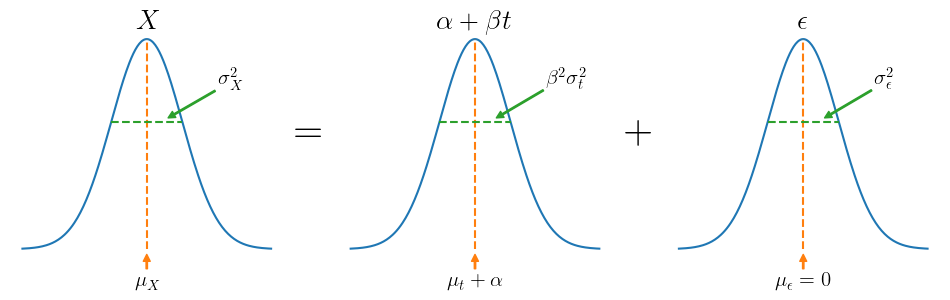

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][0:3]

x = np.linspace(-3.5, 3.5, 250)
y = 1 / np.sqrt(2 * np.pi) * np.exp(-x**2/2)
titles = [r'$X$', r'$\alpha + \beta t$', r'$\epsilon$']
means = [r'$\mu_X$', r'$\mu_t + \alpha$', r'$\mu_{\epsilon} = 0$']
sigmas = [r'$\sigma_X^2$', r'$\beta^2 \sigma_t^2$', r'$\sigma_{\epsilon}^2$']

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for axis, title, mean, sigma in zip(ax, titles, means, sigmas):
    axis.plot(x, y)
    axis.plot([0, 0], [0, np.interp(0, x, y)], linestyle='--')
    axis.plot([-1, 1], np.interp([1, 1], x, y), linestyle='--')
    axis.axis('off')
    axis.text(0, np.max(ax[0].get_ylim()), title, fontsize=20, ha='center')
    axis.annotate(mean, (0, -0.01), (0, -0.07),
                  arrowprops={'width':1, 'headwidth': 5, 'headlength':5, 'ec': colors[1],
                              'fc': colors[1]},
                  fontsize=15, ha='center')
    axis.annotate(sigma, (0.6, np.interp(1, x, y) * 1.03), (2, np.interp(1, x, y) * 1.3),
                  arrowprops={'width':1, 'headwidth': 5, 'headlength':5, 'ec': colors[2],
                              'fc': colors[2]},
                  fontsize=15, ha='left')

fig.text(0.375, 0.5, '=', fontsize=30, ha='center')
fig.text(0.65, 0.5, '+', fontsize=30, ha='center')
plt.savefig('TC_diagram.svg')